### Question 1: Identify the spam (90)

Following is a data with 3921 email. Each one has been identified as spam (1) or not (0). The research question is to use the other features in the data to predict whether an email is spam or not. The descriptions for each feature are listed in the data_description.txt file. When splitting the training and testing data, use 50%/50%. 

In [1]:
import pandas as pd

df = pd.read_csv("email.csv")
print(df.head())

   spam  to_multiple  from  cc  sent_email                 time  image  \
0     0            0     1   0           0  2012-01-01 01:16:41      0   
1     0            0     1   0           0  2012-01-01 02:03:59      0   
2     0            0     1   0           0  2012-01-01 11:00:32      0   
3     0            0     1   0           0  2012-01-01 04:09:49      0   
4     0            0     1   0           0  2012-01-01 05:00:01      0   

   attach  dollar winner  ...  viagra  password  num_char  line_breaks  \
0       0       0     no  ...       0         0    11.370          202   
1       0       0     no  ...       0         0    10.504          202   
2       0       4     no  ...       0         0     7.773          192   
3       0       0     no  ...       0         0    13.256          255   
4       0       0     no  ...       0         2     1.231           29   

   format  re_subj  exclaim_subj  urgent_subj  exclaim_mess  number  
0       1        0             0        

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

1. Pick the "num_char" and "line_breaks" and as two features. Fit a Naive Bayes Model. (10)

In [3]:
X = np.array(df[['num_char', 'line_breaks']])
y = np.array(df['spam'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4400)

nb_model = GaussianNB().fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1781
           1       0.00      0.00      0.00       180

    accuracy                           0.91      1961
   macro avg       0.45      0.50      0.48      1961
weighted avg       0.82      0.91      0.86      1961



C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Pick the "num_char" and "line_breaks" and as two features. Fit a LDA Model. (10)

In [4]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_pred)
print("LDA Classification Report:\n", lda_report)

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1781
           1       0.00      0.00      0.00       180

    accuracy                           0.91      1961
   macro avg       0.45      0.50      0.48      1961
weighted avg       0.82      0.91      0.86      1961



C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Pick the "num_char" and "line_breaks" and as two features. Fit a SVM Model. Tune cost parameter(C) and gamma. (15)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'gamma': ['scale', 'auto'],'C': [0.01, 0.1, 1, 10]}

# Perform grid search cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test)

print("Best SVM accuracy: ", accuracy_score(y_test, y_pred))
print("Best parameters: ", best_params)

Best SVM accuracy:  0.9112697603263641
Best parameters:  {'C': 1, 'gamma': 'auto'}


4. Pick the "num_char" and "line_breaks" and as two features. Fit a Decision tree Model with max level equal to 4. Plot the decision tree. (15)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy: ", accuracy)

Decision Tree accuracy:  0.9087200407955125


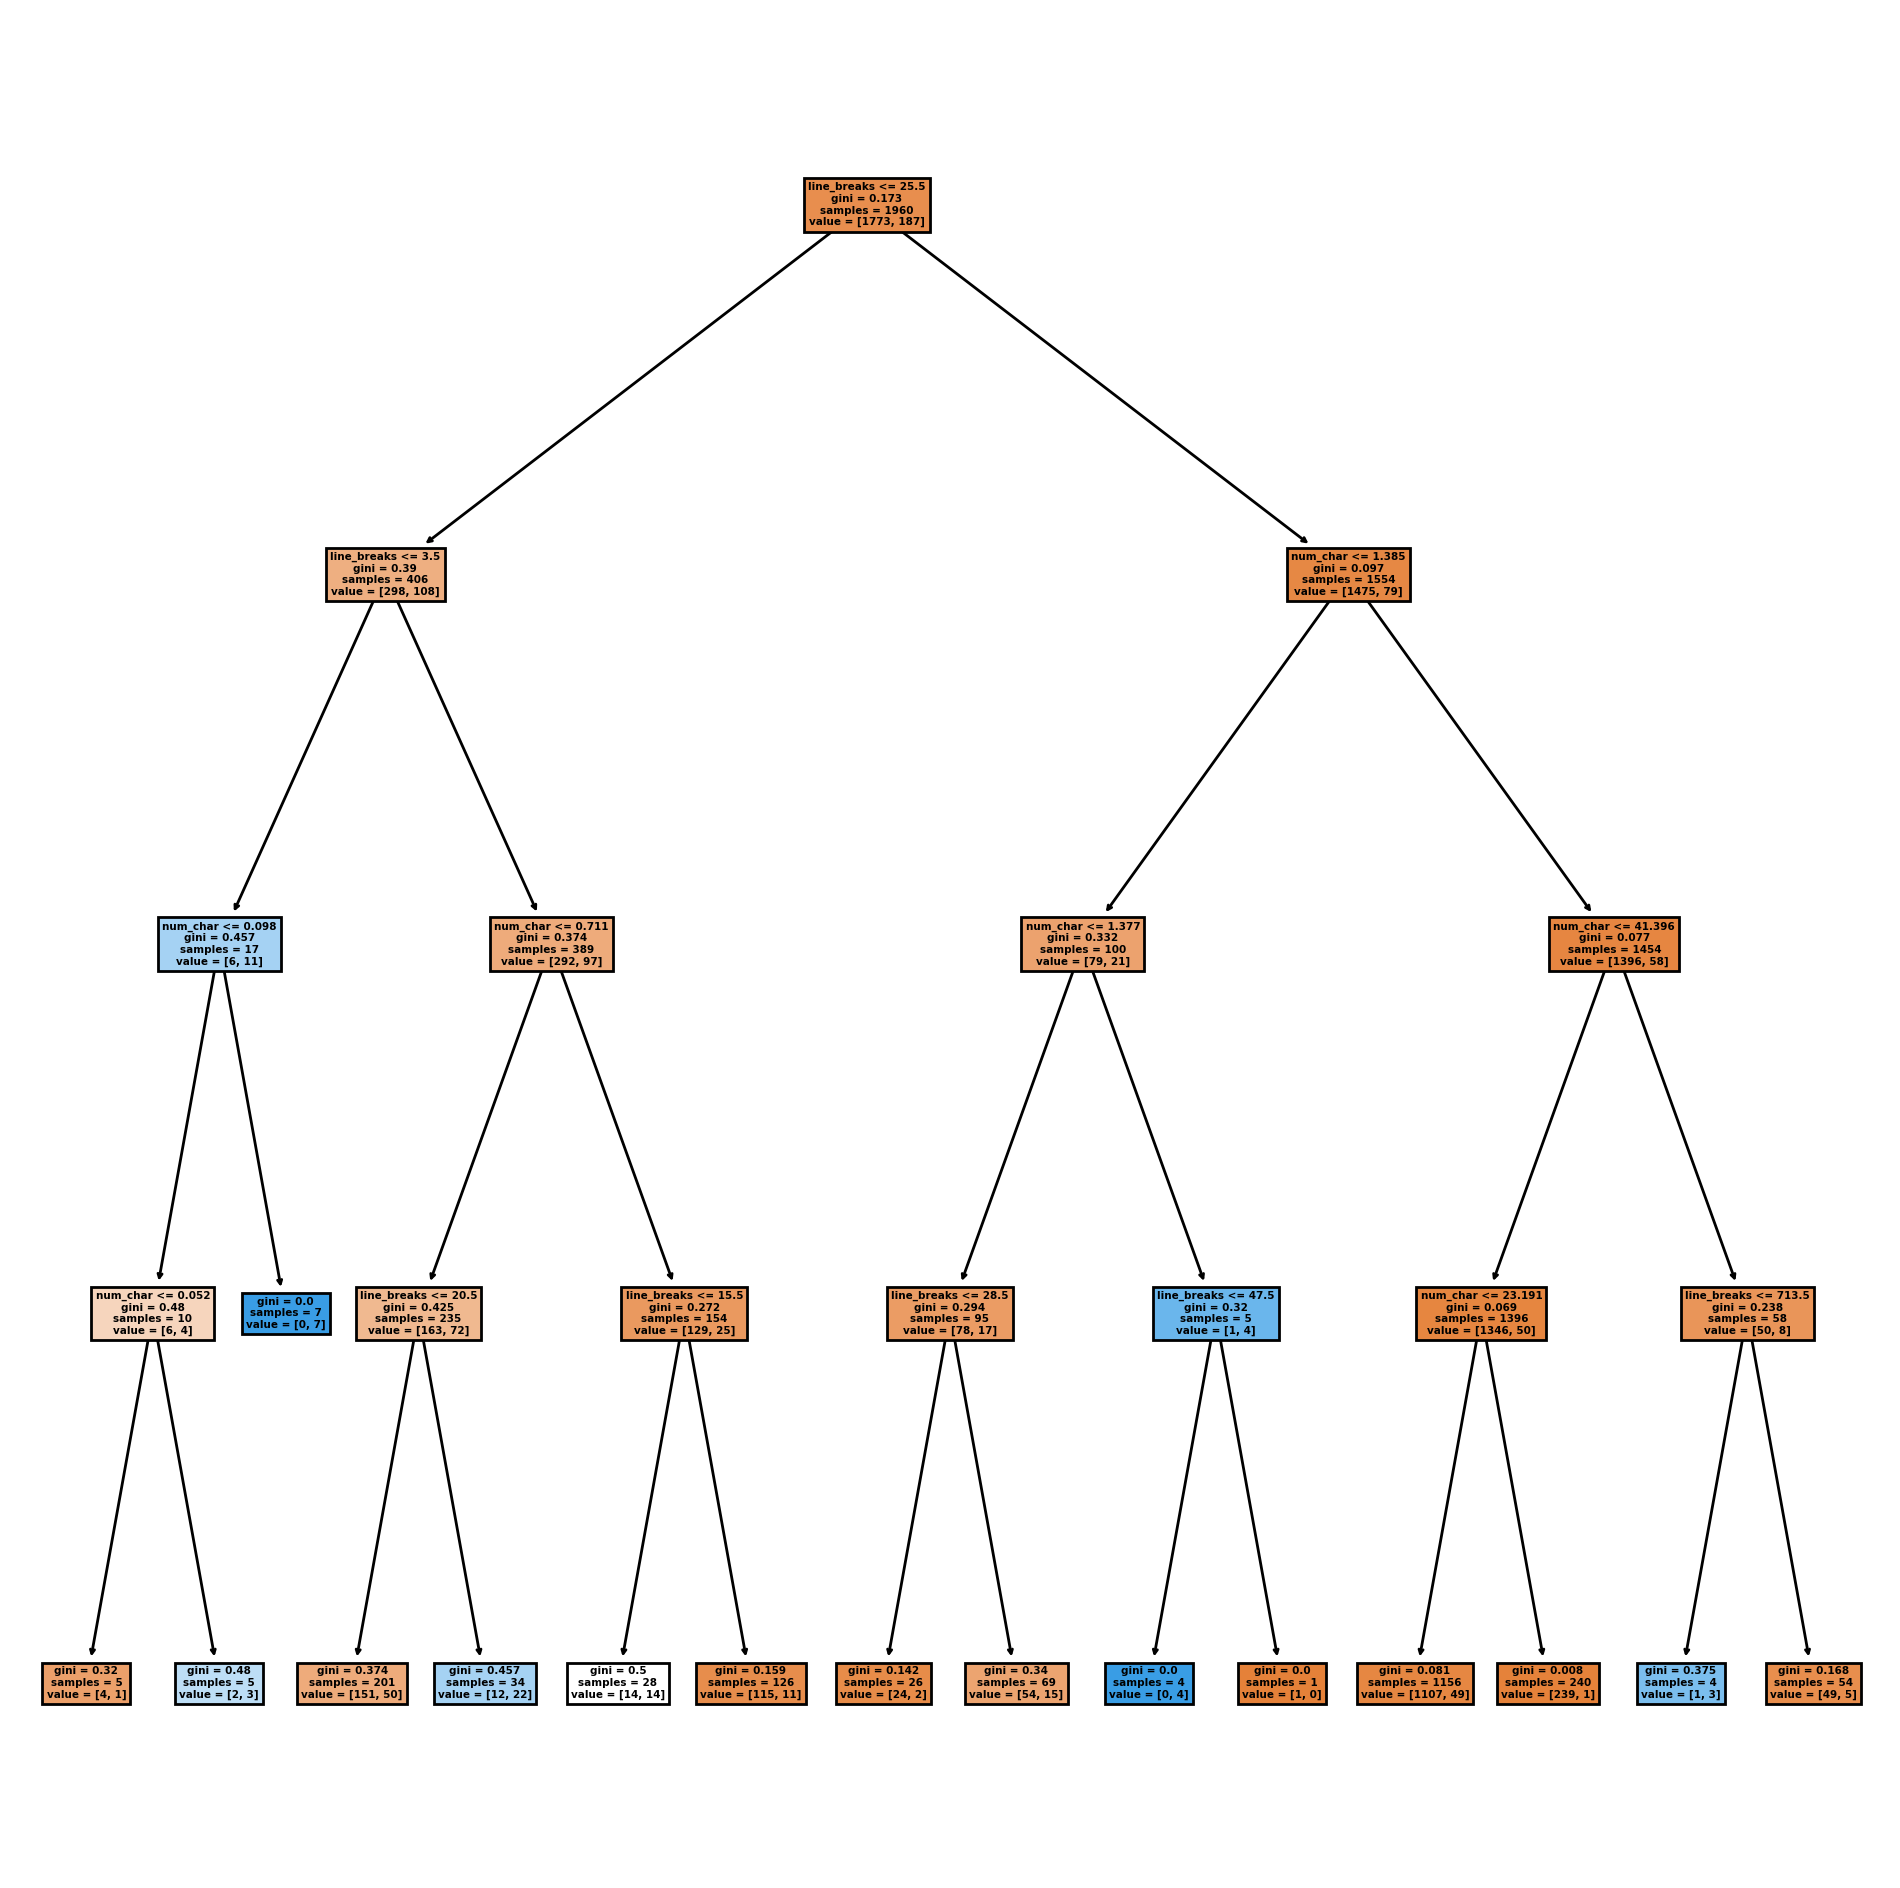

In [7]:
plt.figure(figsize=(12,12), dpi=200)
plot_tree(dt, filled=True, feature_names=['num_char', 'line_breaks'])
plt.show()

5. Plot the decision boundary for the previous 4 models (20)

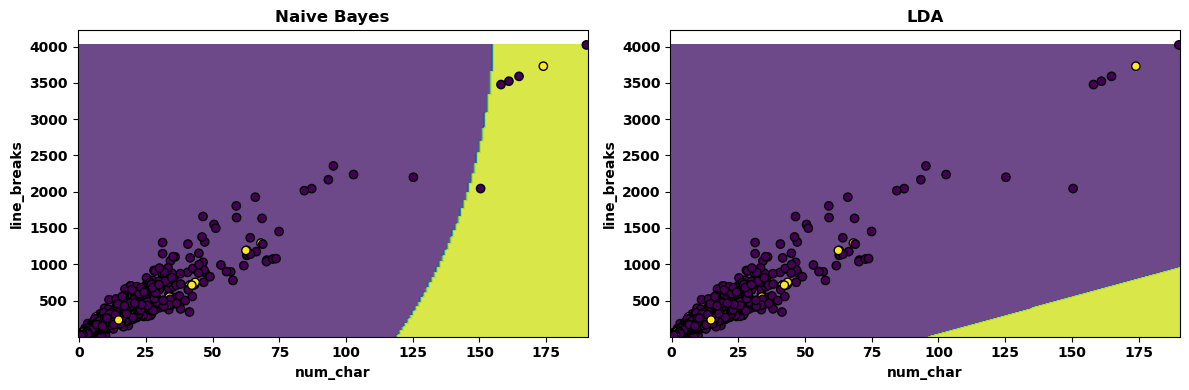

In [8]:
# NB and LDA Decision Boundary

import warnings
warnings.filterwarnings('ignore')

# Create a meshgrid of points
x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, edgecolor = "k")
plt.xlabel("num_char")
plt.ylabel('line_breaks')
plt.title('Naive Bayes')

plt.subplot(1,2,2)
plt.contourf(xx, yy, lda_pred, alpha = 0.8)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, edgecolor = "k")
plt.xlabel("num_char")
plt.ylabel('line_breaks')
plt.title('LDA')

plt.tight_layout()
plt.show()

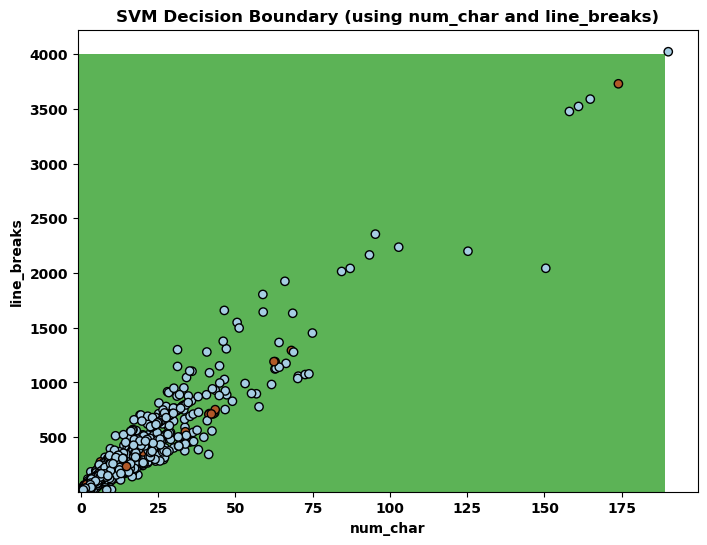

In [10]:
# SVM Decision Boundary

# Create a meshgrid of points to make predictions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                     np.arange(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = best_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('SVM Decision Boundary (using num_char and line_breaks)')
plt.show()

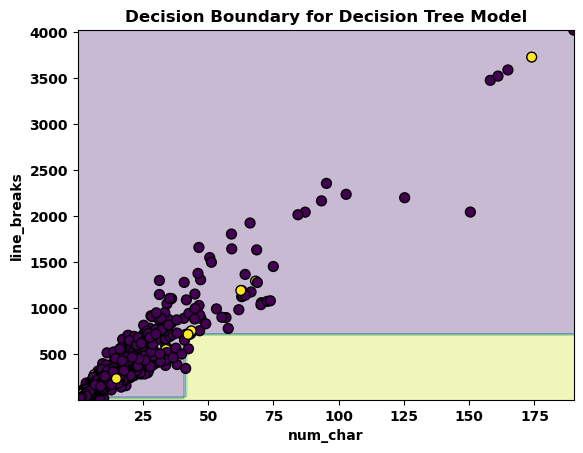

In [11]:
# Decision Tree Decision Boundary

num_char_range = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
line_breaks_range = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100)
xx, yy = np.meshgrid(num_char_range, line_breaks_range)

mesh_predictions = dt.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

plt.contourf(xx, yy, mesh_predictions, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolors='k', marker='o', s=50)
plt.xlabel('num_char')
plt.ylabel('line_breaks')
plt.title('Decision Boundary for Decision Tree Model')
plt.show()

6. Remove the "time" from the data. Fit all the other features to a random forest model. Tune at least 3 parameters. Plot the variable importance plot. (20)

In [12]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['time', 'spam'])
X = pd.get_dummies(X, columns = ['winner', 'number'])
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4400)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5], 'max_features': ['sqrt', 'log2']}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions using the best Random Forest classifier
y_pred = best_rf.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best Random Forest accuracy: ", accuracy)
print("Best RF params: ", best_params)

Best Random Forest accuracy:  0.9316675165731769
Best RF params:  {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


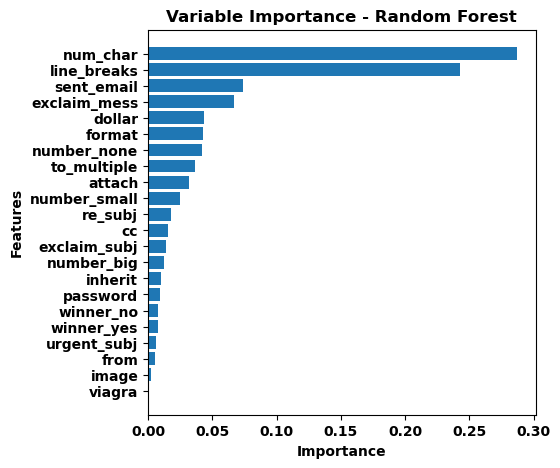

In [13]:
# Plot the variable importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)
columns = list(df.columns)
columns.pop(0)
columns.pop(4)

plt.figure(figsize=(5, 5))
plt.title("Variable Importance - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [X_train.columns[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### Question 2: Interpret the code (10)

Read the following simulation code and figure. Explain what this code is doing and write what you have learned from the simulation.  

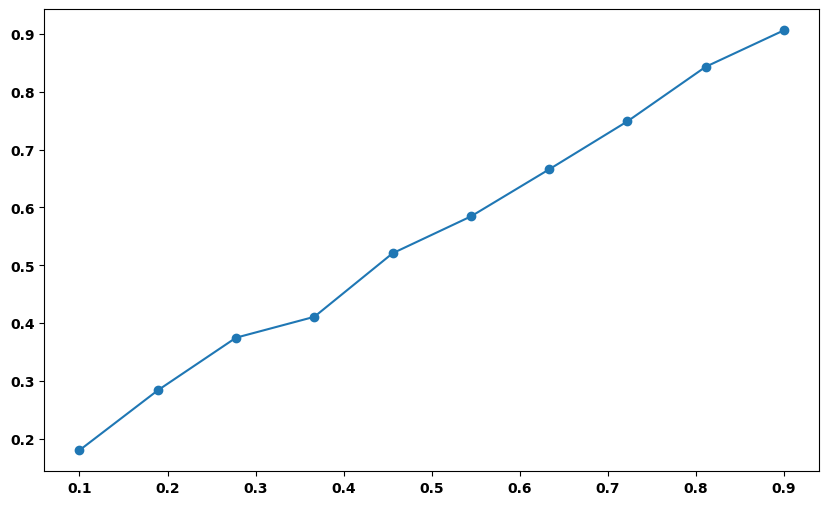

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulation settings
n_features = 10
sample_size = 1000
n_simulations = 10

# Initialize results arrays
correlation_levels = np.linspace(0.1, 0.9, n_simulations)
variance_explained = []

for correlation in correlation_levels:
    cov_matrix = np.eye(n_features) * (1 - correlation) + correlation
    data = np.random.multivariate_normal(mean=np.zeros(n_features), 
                                         cov=cov_matrix, size=sample_size)
    pca = PCA(n_components=1)
    pca.fit(data)

    explained_variance = pca.explained_variance_ratio_[0]
    variance_explained.append(explained_variance)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(correlation_levels, variance_explained, marker='o')
plt.show()


This code simulates the explained variance of the first principal component when PCA is applied to random multivariate normally distributed data with 1000 rows and 10 cols (features). The code introduces correlation between the features increasingly by introducing this correlation to the data through a covariance matrix that varies in level by the correlation_levels array which has 10 different levels of correlation. I've learned that the first principal component explains more of the variance between features as the correlation level increases. This aligns with the intuition behind PCA since it takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables (principal components). Moreover, PCA tends to capture patterns of high variance, and in the presence of correlation, it groups correlated features into the same principal component.